# Pymaceuticals Inc.

## Analysis

- Add analysis here

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Read csv files
mouse_metadata = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Check for missing info
mouse_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
# Number of mice
mouse_study_df['Mouse ID'].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Clean DataFrame by dropping duplicate Mouse ID
mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID']!='g989', :]
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Number of mice in clean DataFrame
mouse_study_df['Mouse ID'].nunique()

248

# Summary Statistics

In [11]:
mouse_study_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
# Mean of tumor volume for each drug regimen
tumor_vol_mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Median of tumor volume for each drug regimen
tumor_vol_med = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Variance of tumor volume for each drug regimen
tumor_vol_var = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(ddof=0)
tumor_vol_var

Drug Regimen
Capomulin    24.839296
Ceftamin     39.069446
Infubinol    42.886388
Ketapril     68.188930
Naftisol     65.817708
Placebo      60.830138
Propriva     43.555716
Ramicane     23.383692
Stelasyn     59.122106
Zoniferol    48.266689
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Standard deviation of tumor volume for each drug regimen
tumor_vol_std = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(ddof=0)
tumor_vol_std

Drug Regimen
Capomulin    4.983904
Ceftamin     6.250556
Infubinol    6.548770
Ketapril     8.257659
Naftisol     8.112811
Placebo      7.799368
Propriva     6.599675
Ramicane     4.835669
Stelasyn     7.689090
Zoniferol    6.947423
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# SEM of tumor volume for each drug regimen
tumor_vol_sem = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(ddof=0)
tumor_vol_sem

Drug Regimen
Capomulin    0.328629
Ceftamin     0.468499
Infubinol    0.490851
Ketapril     0.602252
Naftisol     0.594860
Placebo      0.579722
Propriva     0.542490
Ramicane     0.320250
Stelasyn     0.571526
Zoniferol    0.514977
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table
summary_stats_df = pd.DataFrame({
    "Mean":tumor_vol_mean,
    "Median":tumor_vol_med,
    "Variance":tumor_vol_var,
    "Standard Deviation":tumor_vol_std,
    "SEM":tumor_vol_sem
})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [18]:
summary_stats_agg = summary_stats_df.agg({"Mean" : ['mean'], "Median" : ['median'], "Variance" : ['var'], \
                                         "Standard Deviation" : ['std'], "SEM" : ['sem']})
summary_stats_agg

,Mean,Median,Variance,Standard Deviation,SEM
mean,50.975982,NaN,NaN,NaN,NaN
median,NaN,51.819532,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,0.032607
std,NaN,NaN,NaN,1.212026,NaN
var,NaN,NaN,253.316962,NaN,NaN


# Bar and Pie Charts

In [19]:
drug_count = mouse_study_df["Drug Regimen"].value_counts()
drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

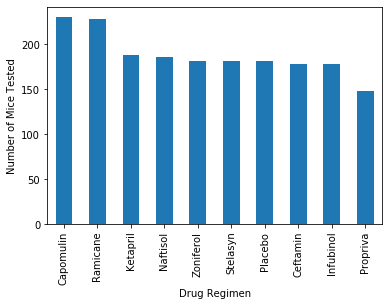

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
fig1 = drug_count.plot(kind="bar")
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Mice Tested")
plt.show()

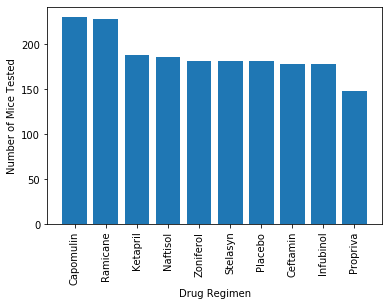

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = np.arange(len(mouse_study_df['Drug Regimen'].value_counts()))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_count)
plt.xticks(tick_locations, labels=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",\
                                   "Ceftamin","Infubinol","Propriva"], rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

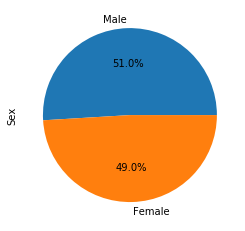

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_df["Sex"].value_counts()[["Male", "Female"]].plot(kind="pie", y="Sex", autopct="%1.1f%%")
plt.show()

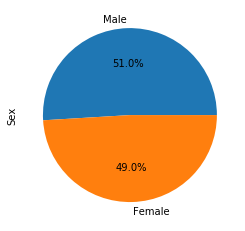

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [mouse_study_df["Sex"].value_counts()["Male"], mouse_study_df["Sex"].value_counts()["Female"]]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [24]:
# Greatest timepoint for each mouse
mouse_study_grp = pd.DataFrame(mouse_study_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this grouped Dataframe with the original Dataframe
mouse_study_merged = pd.merge(mouse_study_grp, mouse_study_df, how='inner', on=['Timepoint', 'Mouse ID'])
mouse_study_merged.set_index("Mouse ID", inplace=True)
mouse_study_merged

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in mouse_study_merged:
    for name in treatment_names:
        if i[2]==name:
            tumor_vol_data.append(mouse_study_merged["Tumor Volume (mm3)"])
    
tumor_vol_data
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

[]

In [ ]:


# capomulin_df = mouse_study_merged.loc[mouse_study_merged["Drug Regimen"]=="Capomulin",:]
# ramicane_df = mouse_study_merged.loc[mouse_study_merged["Drug Regimen"]=="Ramicane",:]
# infubinol_df = mouse_study_merged.loc[mouse_study_merged["Drug Regimen"]=="Infubinol",:]
# ceftamin_df = mouse_study_merged.loc[mouse_study_merged["Drug Regimen"]=="Ceftamin",:]

# capomulin_df

In [ ]:
# Create lists
treatment_names = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# #tumor_vol = [mouse_study_merged["Tumor Volume (mm3)"] for name in treatment_names==mouse_study_merged["Drug Regimen"]]
# tumor_vol_cap = [capomulin_df[["Tumor Volume (mm3)"]] for n in range(capomulin_df["Drug Regimen"])]
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

# drug_regimen = mouse_study_merged["Drug Regimen"]

# Calculate the IQR and quantitatively determine if there are any potential outliers

# vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

# tumor_vol_cap = [mouse_study_merged[["Tumor Volume (mm3)"]] for name in drug_regimen]
# tumor_vol_cap

# for name in range(0, len(mouse_study_merged["Drug Regimen"])):
#     if name=="Capomulin":
#         tumor_vol_cap.append(mouse_study_merged["Tumor Volume (mm3)"].values)
#     elif name=="Ramicane":
#         tumor_vol_ram.append(mouse_study_merged["Tumor Volume (mm3)"].values)
#     elif name=="Infubinol":
#         tumor_vol_inf.append(mouse_study_merged["Tumor Volume (mm3)"].values)
#     elif name=="Ceftamin":
#         tumor_vol_cef.append(mouse_study_merged["Tumor Volume (mm3)"].values)
        
tumor_vol = []
    
for name in range(0, len(mouse_study_merged["Drug Regimen"])):
    tumor_vol.append(mouse_study_merged["Tumor Volume (mm3)"].values)


# tumor_vol = [mouse_study_merged["Tumor Volume (mm3)"].values for name in treatment_names]
# tumor_vol

# if not tumor_vol.empty: 
#     print('Pandas series have some value')
# else:
#     print('Pandas series is empty')

tumor_vol


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for n in mouse_study_merged["Drug Regimen"]:
    if n=="Capomulin" and "Ramicane" and "Infubinol" and "Ceftamin":
        tumor_vol_data.append(mouse_study_merged["Tumor Volume (mm3)"].values)

tumor_vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    